In [1]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

oeid = 501474098

# Initializations:
boc = BrainObservatoryCache()
nwb_dataset = boc.get_ophys_experiment_data(oeid)

# Get Data:
metadata = nwb_dataset.get_metadata()
timestamps, dff = nwb_dataset.get_dff_traces()

In [2]:
from oasis.functions import deconvolve

In [16]:
import numpy as np

def extract_events(fluorescence):

    events = np.apply_along_axis(
        lambda trace: deconvolve(trace,g=(None,None),penalty=1)[1],
        axis=0,
        arr=fluorescence.astype(np.double),
    )
    return events

events = extract_events(dff)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

(-0.1, 0.5)

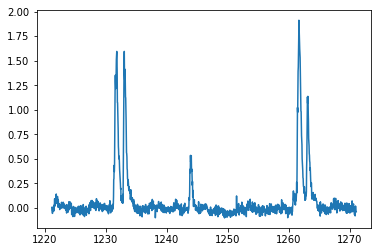

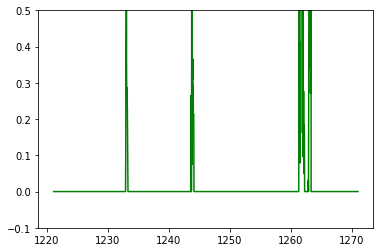

In [14]:
ii = 1

w = 36500,38000

plt.plot(timestamps[w[0]:w[1]],dff[ii,w[0]:w[1]])
plt.figure()
plt.plot(timestamps[w[0]:w[1]],events[ii,w[0]:w[1]],color='g')
plt.ylim([-0.1,0.5])